# Library and Imports

In [2]:
import pandas as pd
import seaborn as sns
import warnings 
import numpy as np
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# Problem Description & Import Data
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.
* Dataset source: https://www.kaggle.com/code/aditimulye/mental-health-at-workplace

In [3]:
df_raw = pd.read_csv('survey.csv')
print(df_raw.shape)
print(df_raw.info())
print(df_raw.describe())

(1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 1

In [4]:
# make a copy of the original dataset
df_train = df_raw.copy()

# Data Cleaning


## Missing Values

In [5]:
total_nulls = df_train.isnull().sum().sort_values(ascending = False)
percent_nulls = df_train.isnull().sum() / (df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nulls, percent_nulls], axis=1, keys=['total', 'percent'])
missing_data.head()

,total,percent
comments,1095,0.869738
state,515,0.409055
work_interfere,264,0.209690
self_employed,18,0.014297
seek_help,0,0.000000


In [6]:
# delete useless colums
df_train.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
df_train = df_train.drop(['Timestamp', 'comments', 'state', 'Country'], axis=1)

In [8]:
df_train.isnull().sum().max()

264

# Data Preparation & Feature Engineering

In [9]:
df_train.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [10]:
# check unique values of age
df_train['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [11]:
# check unique values of gender
df_train['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

## Cleaning Age/Gender responses

In [12]:
df_train.drop(df_train[df_train['Age'] < 16].index, inplace=True)
df_train.drop(df_train[df_train['Age'] > 100].index, inplace=True)
df_train['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [13]:
df_train['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace=True)
df_train['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)
df_train["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

In [14]:
df_train['Gender'].value_counts()

Male      986
Female    247
Other      18
Name: Gender, dtype: int64

# EDA

In [15]:
try: 
    import seaborn as sns 
except:
    %pip install seaborn

In [16]:
colns = df_train.columns.tolist()

In [21]:
# check unique values under each question
for col in colns:
    print('{}:{}'.format(col, df_train[col].unique()))

Age:[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]
Gender:['Female' 'Male' 'Other']
self_employed:[nan 'Yes' 'No']
family_history:['No' 'Yes']
treatment:['Yes' 'No']
work_interfere:['Often' 'Rarely' 'Never' 'Sometimes' nan]
no_employees:['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work:['No' 'Yes']
tech_company:['Yes' 'No']
benefits:['Yes' "Don't know" 'No']
care_options:['Not sure' 'No' 'Yes']
wellness_program:['No' "Don't know" 'Yes']
seek_help:['Yes' "Don't know" 'No']
anonymity:['Yes' "Don't know" 'No']
leave:['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_health_consequence:['No' 'Maybe' 'Yes']
phys_health_consequence:['No' 'Yes' 'Maybe']
coworkers:['Some of them' 'No' 'Yes']
supervisor:['Yes' 'No' 'Some of them']
mental_health_interview:['No' 'Yes' 'Maybe']
phys_health_interview:['Maybe' 'No' 'Yes']
mental_vs_physical:['Yes' "

### Q: Self-employed & Seeking Treatment or not?

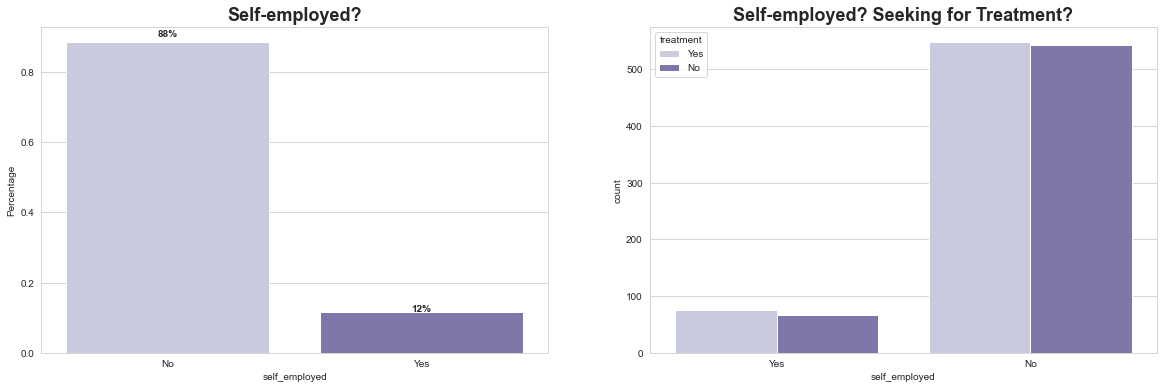

In [18]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title('Self-employed?', fontsize=18, fontweight='bold')
eda_percentage = df_train['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(df_train['self_employed'], hue=df_train['treatment'], palette='Purples')
plt.title('Self-employed? Seeking for Treatment?', fontsize=18, fontweight='bold')
plt.show()


### Q: Family History & Seeking for Treatment?

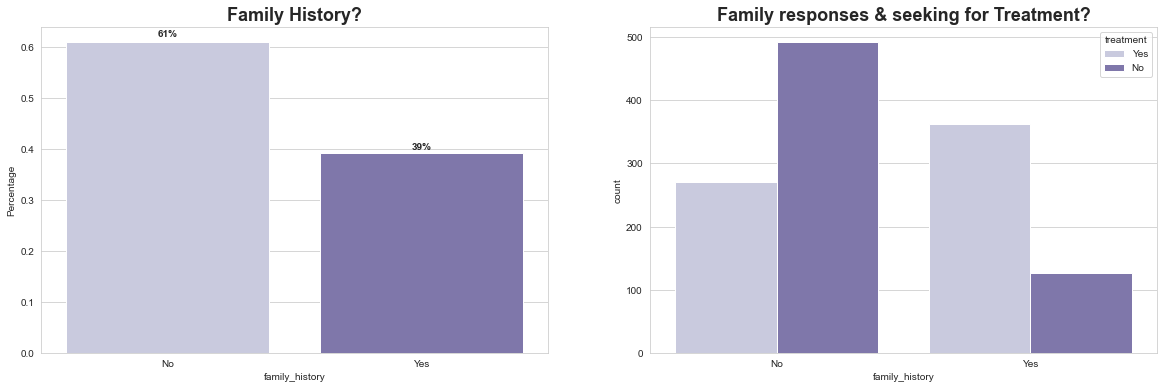

In [29]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title('Family History?', fontsize=18, fontweight='bold')
eda_percentage = df_train['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(df_train['family_history'], hue=df_train['treatment'], palette='Purples')
plt.title('Family responses & seeking for Treatment?', fontsize=18, fontweight='bold')
plt.show()


### Work interference?

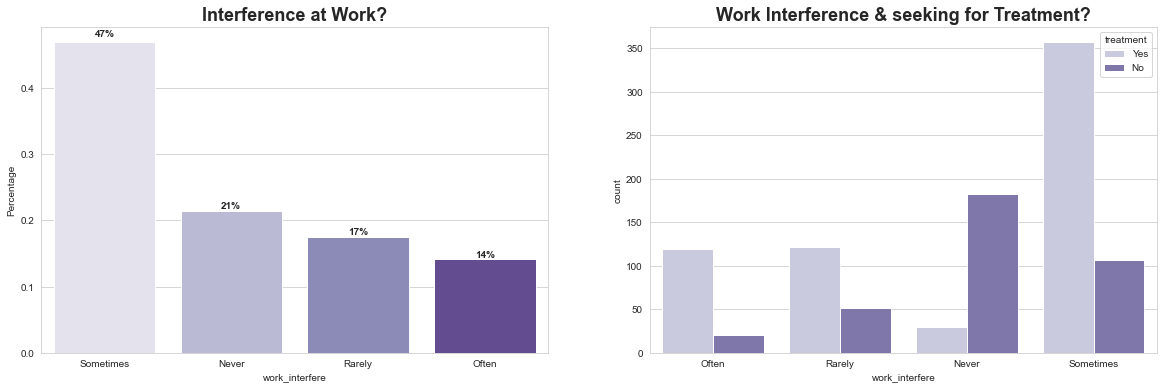

In [28]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title('Interference at Work?', fontsize=18, fontweight='bold')
eda_percentage = df_train['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(df_train['work_interfere'], hue=df_train['treatment'], palette='Purples')
plt.title('Work Interference & seeking for Treatment?', fontsize=18, fontweight='bold')
plt.show()


## Remote Work?

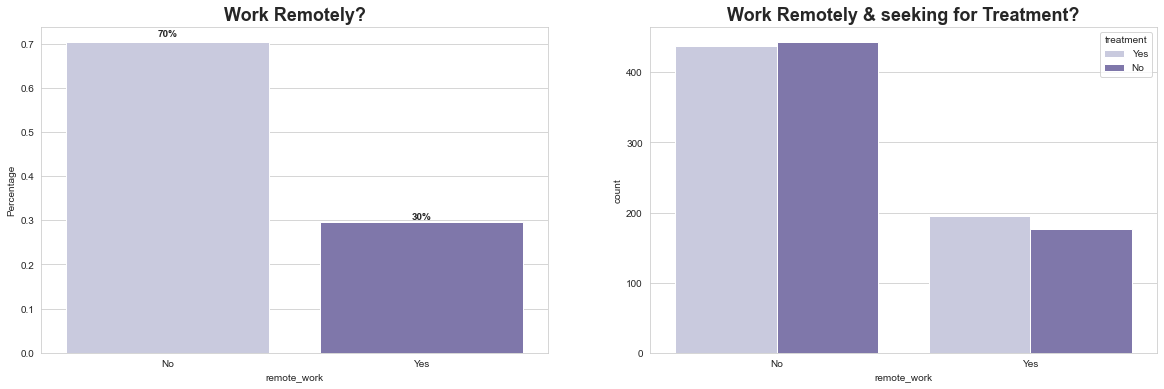

In [26]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title('Work Remotely?', fontsize=18, fontweight='bold')
eda_percentage = df_train['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(df_train['remote_work'], hue=df_train['treatment'], palette='Purples')
plt.title('Work Remotely & seeking for Treatment?', fontsize=18, fontweight='bold')
plt.show()


## In Tech Company?

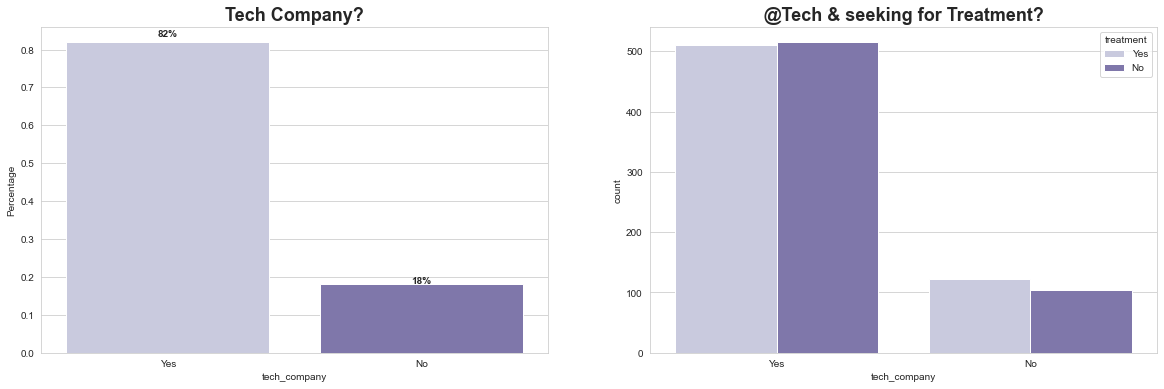

In [30]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title('Tech Company?', fontsize=18, fontweight='bold')
eda_percentage = df_train['tech_company'].value_counts(normalize = True).rename_axis('tech_company').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'tech_company', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(df_train['tech_company'], hue=df_train['treatment'], palette='Purples')
plt.title('@Tech & seeking for Treatment?', fontsize=18, fontweight='bold')
plt.show()


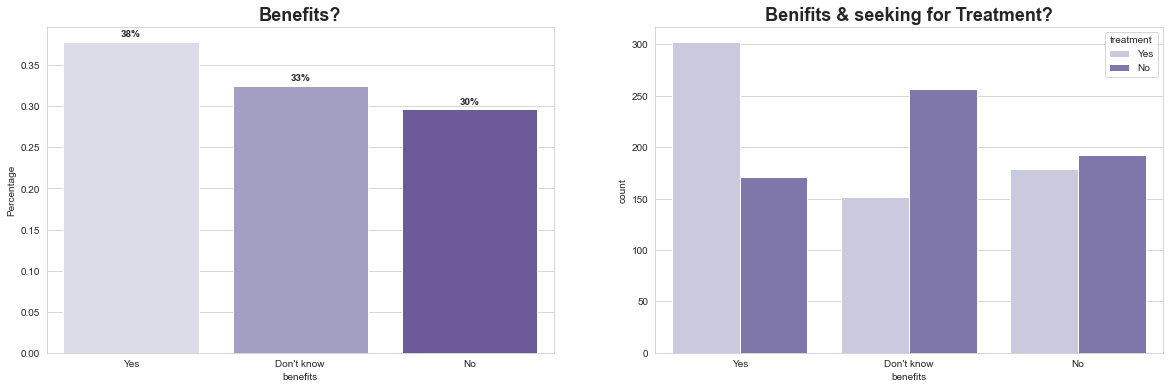

In [31]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.title('Benefits?', fontsize=18, fontweight='bold')
eda_percentage = df_train['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.subplot(1,2,2)
sns.countplot(df_train['benefits'], hue=df_train['treatment'], palette='Purples')
plt.title('Benifits & seeking for Treatment?', fontsize=18, fontweight='bold')
plt.show()


similar graphs needs to be generated for each survery question

# Feature Engineering

In [33]:
## encode categorical features
from sklearn.preprocessing import LabelEncoder

In [34]:
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

In [40]:
le = LabelEncoder()
for col in object_cols:
    df_train[col] = le.fit_transform(df_train[col])

In [42]:
df_train['treatment'].value_counts()

1    632
0    619
Name: treatment, dtype: int64

<AxesSubplot:>

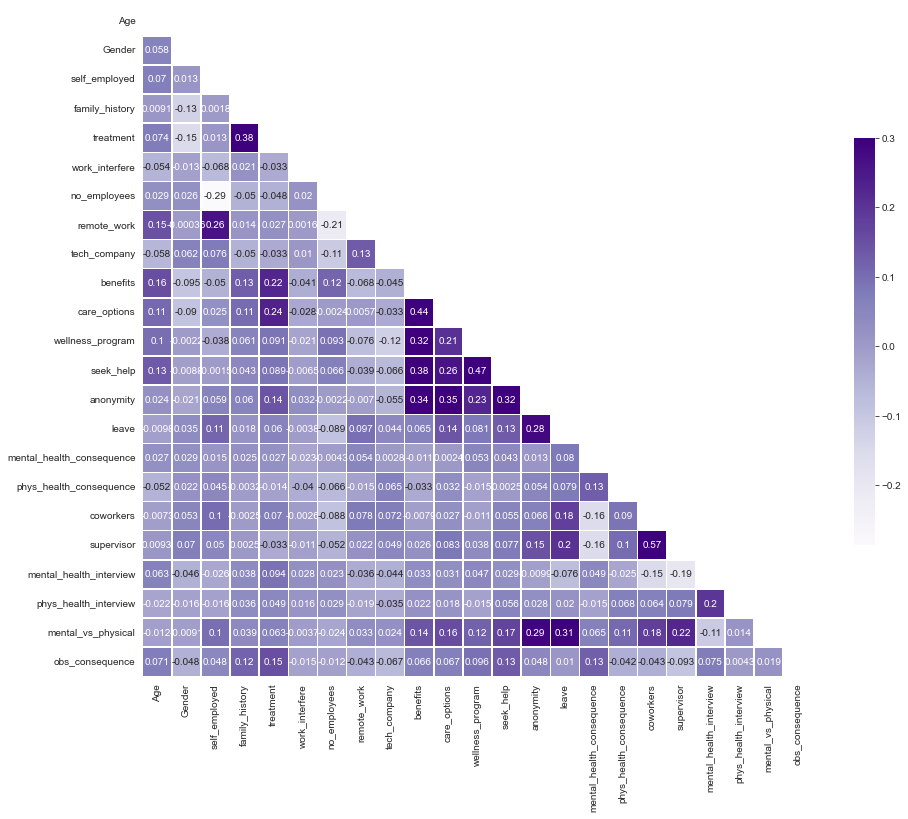

In [44]:
## correlation matrix
corr = df_train.corr()
matrix = np.triu(corr)

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=matrix, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

## Modeling

In [45]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [46]:
from sklearn.model_selection import train_test_split
X = df_train.drop('treatment', axis = 1)
y = df_train['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [47]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), 
        KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), 
        DecisionTreeClassifier(random_state=10), 
        RandomForestClassifier(n_estimators=60, random_state=0), 
        GradientBoostingClassifier(random_state=20),
        AdaBoostClassifier(), 
        xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=0, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               val

In [48]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.6808510638297872
KNeighborsClassifier 0.6569148936170213
DecisionTreeClassifier 0.7420212765957447
RandomForestClassifier 0.7686170212765957
GradientBoostingClassifier 0.800531914893617
AdaBoostClassifier 0.8085106382978723
[18:34:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.7872340425531915


Text(0.5, 1.0, 'Model Performance - Accuracy')

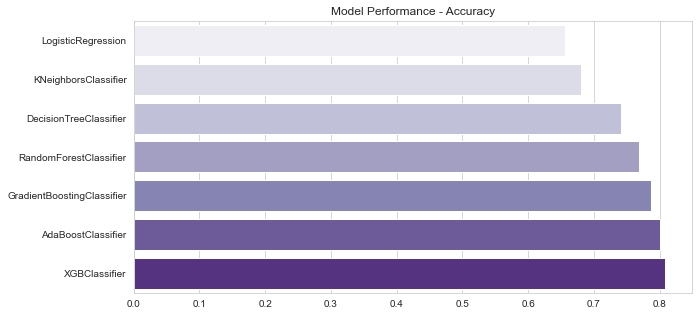

In [52]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x=predicted, y=key, palette='Purples', order=predicted.sort())
ax.set_title('Model Performance - Accuracy')

Text(34.0, 0.5, 'Actual')

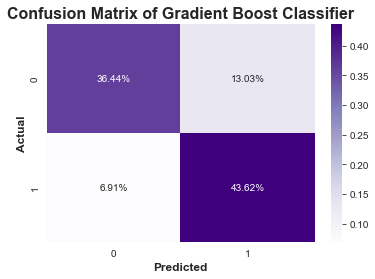

In [53]:
# confusion matrix
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

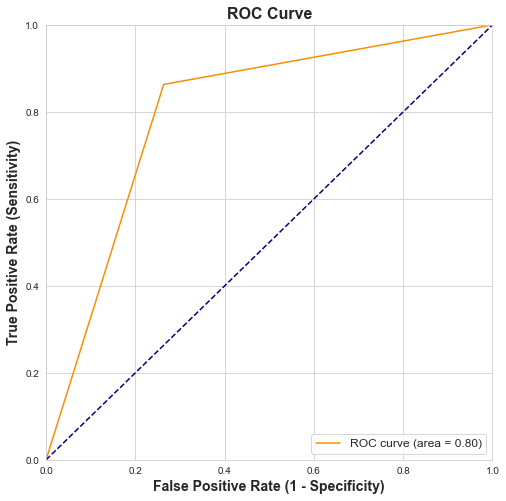

(array([0.        , 0.26344086, 1.        ]),
 array([0.        , 0.86315789, 1.        ]),
 array([2, 1, 0]))

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)